# Cristina Venturini 2022461

## Assignment 3

In [1]:
library(tibble)
library(ggplot2)
library(latex2exp)
library(glue)
library(lubridate)
library(dplyr)
theme_set(theme_bw())

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'latex2exp' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Attaching package: 'dplyr'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following object is masked from 'package:glue':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Exercise 1

The triangular distribution, in the interval $[a;b]$, is given by the following:

$$ f(X)=   \left\{
\begin{array}{lll}
      \frac{2(x-a)}{(b-a)(c-a)} && a \leq x < c \\
      \frac{2(b-x)}{(b-a)(b-c)} && c \leq x \leq b \\
      0 && otherwise \\
\end{array} 
\right.  
$$

where $c \in [a;b]$.

#### 1.1 Plot the function, given the interval $[a;b]$

In [2]:
dfunc = function(x) {pdf = ifelse(a<=x & x<c, 2*(x-a)/((b-a)*(c-a)), ifelse(c<=x & x<=b, 2*(b-x)/((b-a)*(b-c)), 0))
                     return(pdf)
                     }

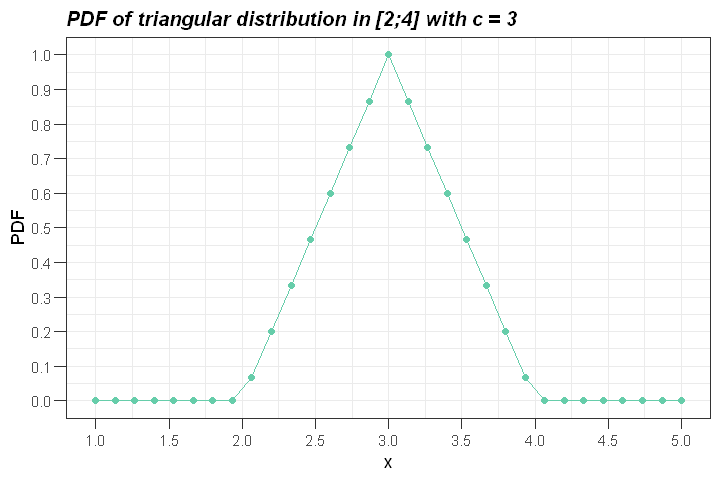

In [3]:
a = 2
b = 4
c = 3

options(repr.plot.width=6, repr.plot.height=4)

x = seq(1,5,length.out=31)
pdf <- dfunc(x)

plot_pdf = tibble('x' = x, 'y' = pdf)
ggplot(plot_pdf) + geom_point(aes(x, y),colour = 'aquamarine3') + geom_line(aes(x, y), colour = 'aquamarine3')+
scale_y_continuous(name = "PDF", breaks = scales::pretty_breaks(n = 8))+
labs(title=glue('PDF of triangular distribution in [{a};{b}] with c = {c}'), x='x')+ 
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

#### 1.2 Write an algorithm to generate random numbers from the triangular distribution
#### 1.3 Generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve

To generate random numbers we can use the inverse transform sampling method; in order to do so we first compute the CDF of our distribution and then implement the actual algotithm. 

The analitic form of the CDF is: 

$$ F(X)=   \left\{
\begin{array}{lll}
      0 && x < a \\
      \frac{(x-a)^2}{(a-b)(a-c)} && a \leq x < c  \\
      \frac{(c-x)(2b-c-x)}{(a-b)(b-c)} && c \leq x \leq b \\
      1 && x > b \\
\end{array} 
\right.  
$$

In [4]:
# easier form to then implement the sampling method avoiding the resolution of a 2nd degree equation

pfunc = function(x){cdf = ifelse(x<a, 0, ifelse(a<=x & x<c, (x-a)^2/((a-b)*(a-c)), ifelse(c<=x & x<=b, (c-x)(2*b-c-x)/((a-b)*(b-c)), 1)))
                    return(cdf)
                    }

rfunc = function(n){
    u = runif(n)
    find_sol = ifelse(u<(c-a)/(b-a), a + sqrt(u*(b-a)*(c-a)), b-sqrt((1-u)*(b-a)*(b-c)))
    return(find_sol)
}

In [5]:
rfunc = tibble('rfunc' = rfunc(10^4))
n = 10^4
bins = 25
fact = n*(max(rfunc$rfunc)-min(rfunc$rfunc))/bins

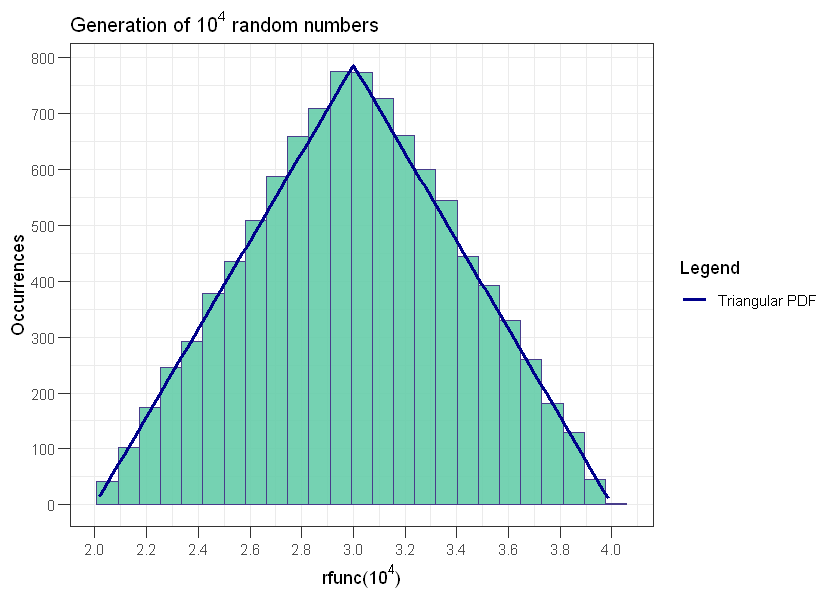

In [6]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(rfunc, aes(x=rfunc)) + geom_histogram(bins=bins, colour='darkslateblue', fill='aquamarine3', alpha=0.9)+
scale_y_continuous(name = "Occurrences", breaks = scales::pretty_breaks(n = 8))+
labs(title=TeX('Generation of $10^4$ random numbers'), 
     x=TeX('rfunc($10^4$)'))+ 
stat_function(fun = function(x) {fact*dfunc(x)}, aes(color = 'Triangular PDF'), size=1)+
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
scale_colour_manual("Legend", values = c("darkblue"))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

## Exercise 2 - Markov's inequality

Markov's inequality represents an upper bound to probability distributions:

$$
P(X \geq k) = \frac{E[X]}{k} \quad \quad k > 0
$$

Having defined a function

$$
G(k) = 1 - F(k) \equiv P(X \geq k)
$$

plot G(k) and the Markov's upper bound for

- the exponential, $Exp(\lambda = 1)$, distribution function.
- the uniform, $U(3; 5)$, distribution function
- the binomial, $Bin(n = 1; p = 1/2)$, distribution function
- a Poisson, $Pois(\lambda = 1/2)$, distribution function

In [7]:
k_ex=2
k = seq(0.8, 5, length=50)

In [8]:
# Here we calculate the various quantities to be plotted

# exponential 

lambda_e = 1
ex_e = 1/lambda_e
me = ex_e/k
pe = 1 - pexp(k, lambda_e)

# uniform

min = 3
max = 5
ex_u = (min + max)/2
mu = ex_u/k
pu = 1 - punif(k, min, max)

# binomial 

n = 1
p = 1/2
ex_b = n*p
mb = ex_b/k
pb = 1- pbinom(k, n, p)

# poisson

lambda_p = 1/2
mp = lambda_p/k
pp = 1- ppois(k, lambda_p)

In [9]:
p = c(pe, pu, pb, pp) 
m = c(me, mu, mb, mp)
factor = rep(c('Exponential (1)', 'Uniform (3, 5)', 'Binomial (1, 1/2)', 'Poisson (1/2)'), each=50)

In [10]:
# Here I create a tibble containing all the informations above in three columns: one for the expressions of G(k), one for the 
# Markov limits, one is a factor thanks to which I'll later plot the different distributions all together with the command
# facet_wrap

plots = tibble('p' = p, 'm' = m, 'factor' = factor)
plots$factor = as.factor(plots$factor)
k_tot = rep(k, times=4)

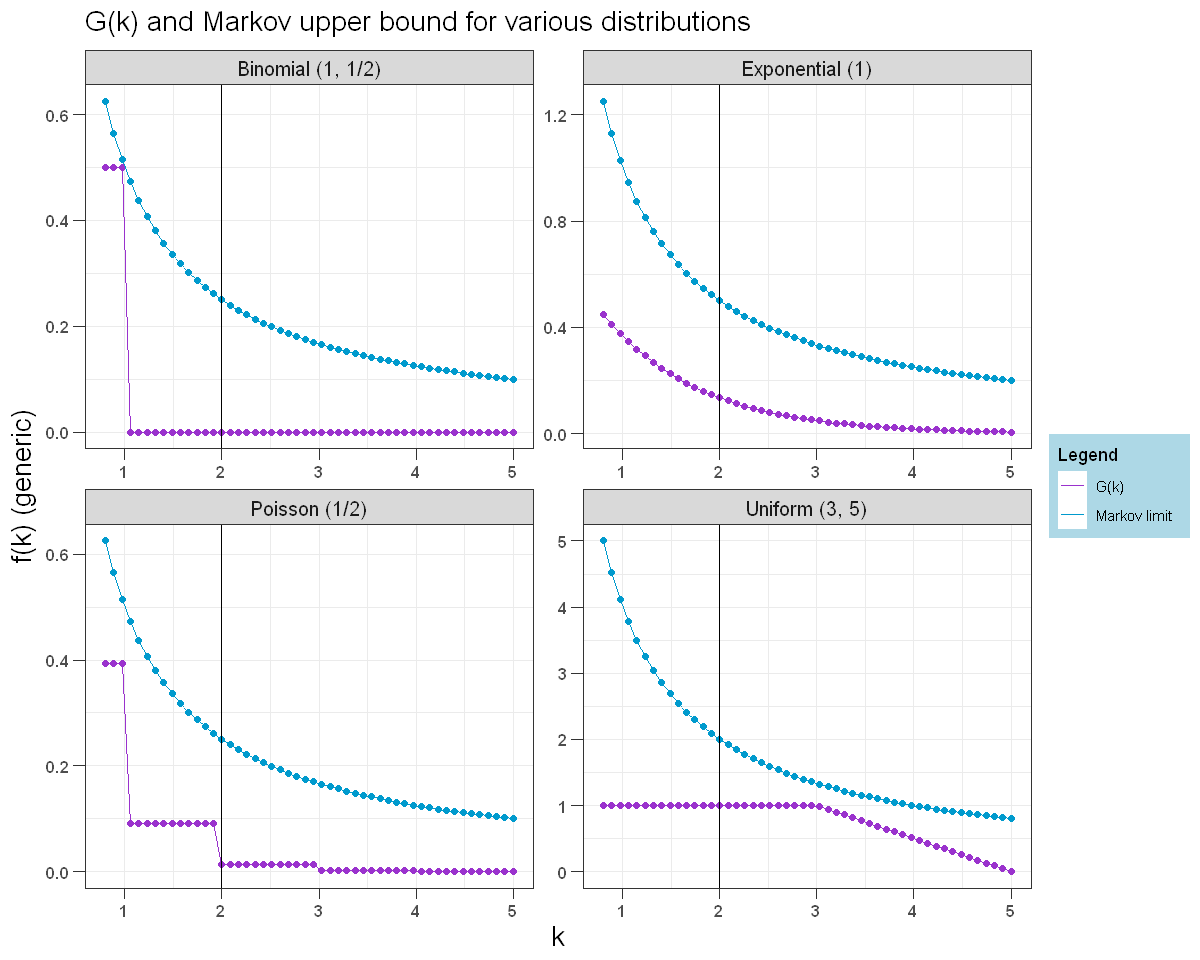

In [11]:
options(repr.plot.width=10, repr.plot.height=8)
plot = ggplot(plots, aes(x=k_tot)) + 
        geom_line(aes(y=p, colour="G(k)")) + geom_point(aes(y=p), colour="darkorchid3") +
        geom_line(aes(y=m, colour="Markov limit")) + geom_point(aes(y=m), colour="deepskyblue3") +
        scale_color_manual(values = c('G(k)' = 'darkorchid3','Markov limit' = 'deepskyblue3')) + labs(color = 'Legend',
        title=TeX('G(k) and Markov upper bound for various distributions'), x = TeX('$k$'), y = TeX('$f(k)$ (generic)')) +
        geom_vline(aes(xintercept = k_ex)) + 
        theme(plot.title = element_text(color="black", size=17, face="bold.italic"), 
        axis.title.x = element_text(color="black", size=16, face="bold"),
        axis.title.y = element_text(color="black", size=16, face="bold"), 
        axis.ticks.length=unit(.25, "cm"),
        axis.text.x = element_text(face="bold", size=10),
        axis.text.y = element_text(face="bold", size=10),
        legend.background = element_rect(fill="lightblue", size=1, linetype="solid"))
plot + facet_wrap(. ~ factor,scales='free', ncol=2) + theme(strip.text.x = element_text(size=12))

It can be seen that for each value of $k$ in the graph, the Markov limit actually constitutes a limit for $G(k)$.

## Exercise 3 - Chebyshev's inequality

Chebyshev's inequality tells us that
$$
P(\lvert x-\mu \rvert \geq k\sigma) \leq \frac{1}{k^2}
$$
which can also be written as
$$
P(\lvert x-\mu \rvert < k\sigma) \geq 1- \frac{1}{k^2}
$$
Use R to show, with a plot, that Chebyshev's inequality is an upper bound to the following distributions:
- a normal distribution, $N(\mu = 3; \sigma = 5)$
- an exponential distribution, $Exp(\lambda = 1)$
- a uniform distribution $U(1-\sqrt(2), 1+\sqrt(2))$
- a Poisson, $Pois(\lambda = 1/3)$, distribution function

In order to be able to use the cumulative distribution function, we derive a complementary formula for Chebyshev inequality:

$$P(|X-\mu|< k\sigma) \geq 1-\frac{1}{k^2}$$
$$P(-k\sigma< X-\mu < k\sigma) \geq 1-\frac{1}{k^2}$$
$$P(\mu-k\sigma< X < \mu+k\sigma) \geq 1-\frac{1}{k^2}$$
$$F(X < \mu+k\sigma) - F(X < \mu-k\sigma) \geq 1-\frac{1}{k^2}$$

with $F(X\leq x)$ the cumulative distribution function.

A small approximation is made, i.e. $F(X\leq x) \approx F(X< x)$

What I'll do is use the last line of the above formula: in particolar I'll plot the right hand side and the left hand side and verify that, in this form of the inequality, the Chebyshev bound is a lower bound.

In [12]:
# Chebyshev bound

c = 1 - 1/k^2

In [13]:
# exponential 

sigma_e = sqrt(1/lambda_e^2)
ge = pexp(ex_e + k*sigma_e, lambda_e) - pexp(ex_e - k*sigma_e, lambda_e)

# uniform

min = 1 - sqrt(2)
max = 1 + sqrt(2)
ex_u = (min + max)/2
sigma_u = sqrt((max-min)^2*1/12)
gu = punif(ex_u + k*sigma_u, min, max) - punif(ex_u - k*sigma_u, min, max)

# normal 

ex_n = 3
sigma_n = 5
gn = pnorm(ex_n + k*sigma_n, ex_n, sigma_n) - pnorm(ex_n - k*sigma_n, ex_n, sigma_n)

# poisson

lambda_p = 1/3
sigma_p = sqrt(lambda_p)
gp = ppois(lambda_p + k*sigma_p, lambda_p) - ppois(lambda_p - k*sigma_p, lambda_p)

In [14]:
g = c(ge, gu, gn, gp)
c = rep(c, times = 4)
factor2 = rep(c('Exponential (1)', 'Uniform (1-sqrt(2), 1+sqrt(2))', 'Normal (3, 5)', 'Poisson (1/3)'), each=50)

In [15]:
plots2 = tibble('g' = g, 'c' = c, 'factor2' = factor2)
plots2$factor = as.factor(plots2$factor2)

In [16]:
k_tot = rep(k, times = 4)

In the graphs, $G(k)=P(|X-\mu|< k\sigma)=F(X < \mu+k\sigma) - F(X < \mu-k\sigma)$, in order to be more compact.

Warning message:
"Removed 3 row(s) containing missing values (geom_path)."Warning message:
"Removed 12 rows containing missing values (geom_point)."Warning message:
"Removed 3 row(s) containing missing values (geom_path)."Warning message:
"Removed 12 rows containing missing values (geom_point)."

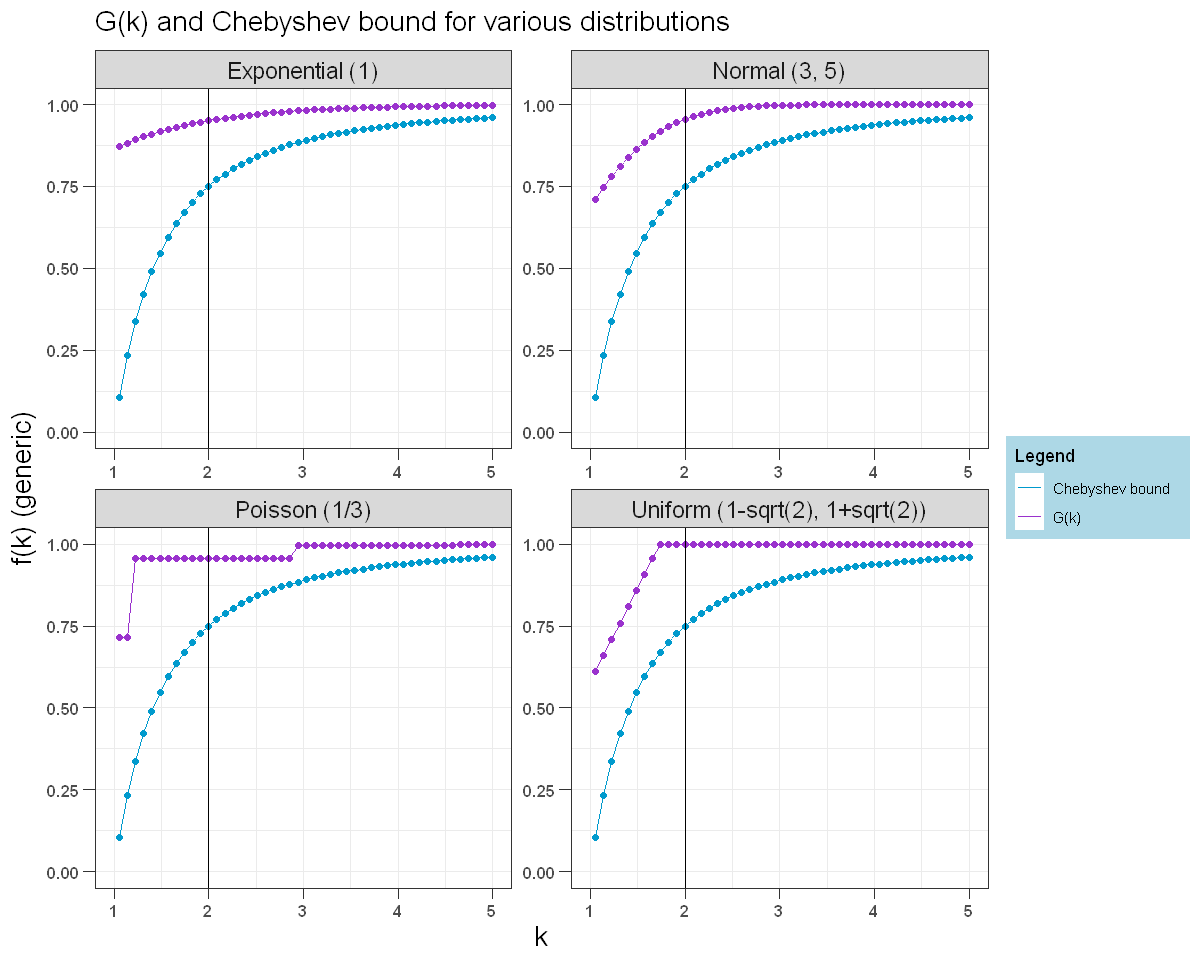

In [17]:
options(repr.plot.width=10, repr.plot.height=8)
plot = ggplot(plots2, aes(x=k_tot)) + 
        geom_line(aes(y=g, colour="G(k)")) + geom_point(aes(y=g), colour="darkorchid3") +
        geom_line(aes(y=c, colour="Chebyshev bound")) + geom_point(aes(y=c), colour="deepskyblue3") +
        geom_vline(aes(xintercept = k_ex))+
        scale_color_manual(values = c('G(k)' = 'darkorchid3','Chebyshev bound' = 'deepskyblue3')) + labs(color = 'Legend',
        title=TeX('$G(k)$ and Chebyshev bound for various distributions'), x = TeX('$k$'), y = TeX('$f(k)$ (generic)')) +
        xlim(1,5) + ylim(0,1) +
        theme(plot.title = element_text(color="black", size=17, face="bold.italic"), 
        axis.title.x = element_text(color="black", size=16, face="bold"),
        axis.title.y = element_text(color="black", size=16, face="bold"), 
        axis.ticks.length=unit(.25, "cm"),
        axis.text.x = element_text(face="bold", size=10),
        axis.text.y = element_text(face="bold", size=10),
        legend.background = element_rect(fill="lightblue", size=1, linetype="solid"))
plot + facet_wrap(. ~ factor2, scales='free', ncol=2) + theme(strip.text.x = element_text(size=14))

As can be seen from the graph, Chebyshev bound is a lower bound for this form of the inequality for each distribution and for each value of $k > 0$.

## Exercise 4 - Community Mobility Open Data

Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/

Download and analyze the following data sets: <br>
https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv <br>
and <br>
https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip <br>

The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 - Feb 6, 2020. <br>
To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:
- retail and recreation, i.e. places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters
- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies
- parks, i.e. national parks, public beaches, marinas, dog parks, plazas and public gardens
- transit stations i.e. all public transport hubs such as subway, bus, and train stations
- workplaces, i.e. places of work
- residential, i.e. people's residence

Select a couple of European countries of your choice and analyze the trends in the previous variables over time:
- produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility stations.

I choose as countries Germany and Belgium.

In [18]:
# load the files

file1 = "2020_DE_Region_Mobility_Report.csv"
file2 = "2020_BE_Region_Mobility_Report.csv"
germany = tibble(read.csv(file1, quote = "", header = T, stringsAsFactors=FALSE))
belgium = tibble(read.csv(file2, quote = "", header = T, stringsAsFactors=FALSE))

In [19]:
# fix the dataframes, getting rid of useless information and renaming the columns

germany[1:8] = NULL
belgium[1:8] = NULL
colnames(germany) = c("date", "RR", "GP", "P", "TS", "WP", "R")
colnames(belgium) = c("date", "RR", "GP", "P", "TS", "WP", "R")

In [20]:
# calculating the weekly and monthly average, after having converted the date accordingly

germany_w = germany %>% mutate(date = week(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)
belgium_w = belgium %>% mutate(date = week(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)
germany_m = germany %>% mutate(date = month(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)
belgium_m = belgium %>% mutate(date = month(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)

In [21]:
# creating useful variables and constructing the dataframe to be plotted; I'll plot in a single plot both countries

date_rep = rep(germany_w$date, times=6)
perc_diff_g = c(germany_w$RR, germany_w$GP, germany_w$P, germany_w$TS, germany_w$WP, germany_w$R)
perc_diff_b = c(belgium_w$RR, belgium_w$GP, belgium_w$P, belgium_w$TS, belgium_w$WP, belgium_w$R)
cat = rep(c("Retail and recreation", "Grocery and pharmacy", "Parks", "Transit stations", "Workplaces",
                  "Residential"), each = 47)
plot_week = tibble('date' = date_rep, 'perc_diff_g' = perc_diff_g, 'perc_diff_b' = perc_diff_b, 'categories' = cat)

Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"

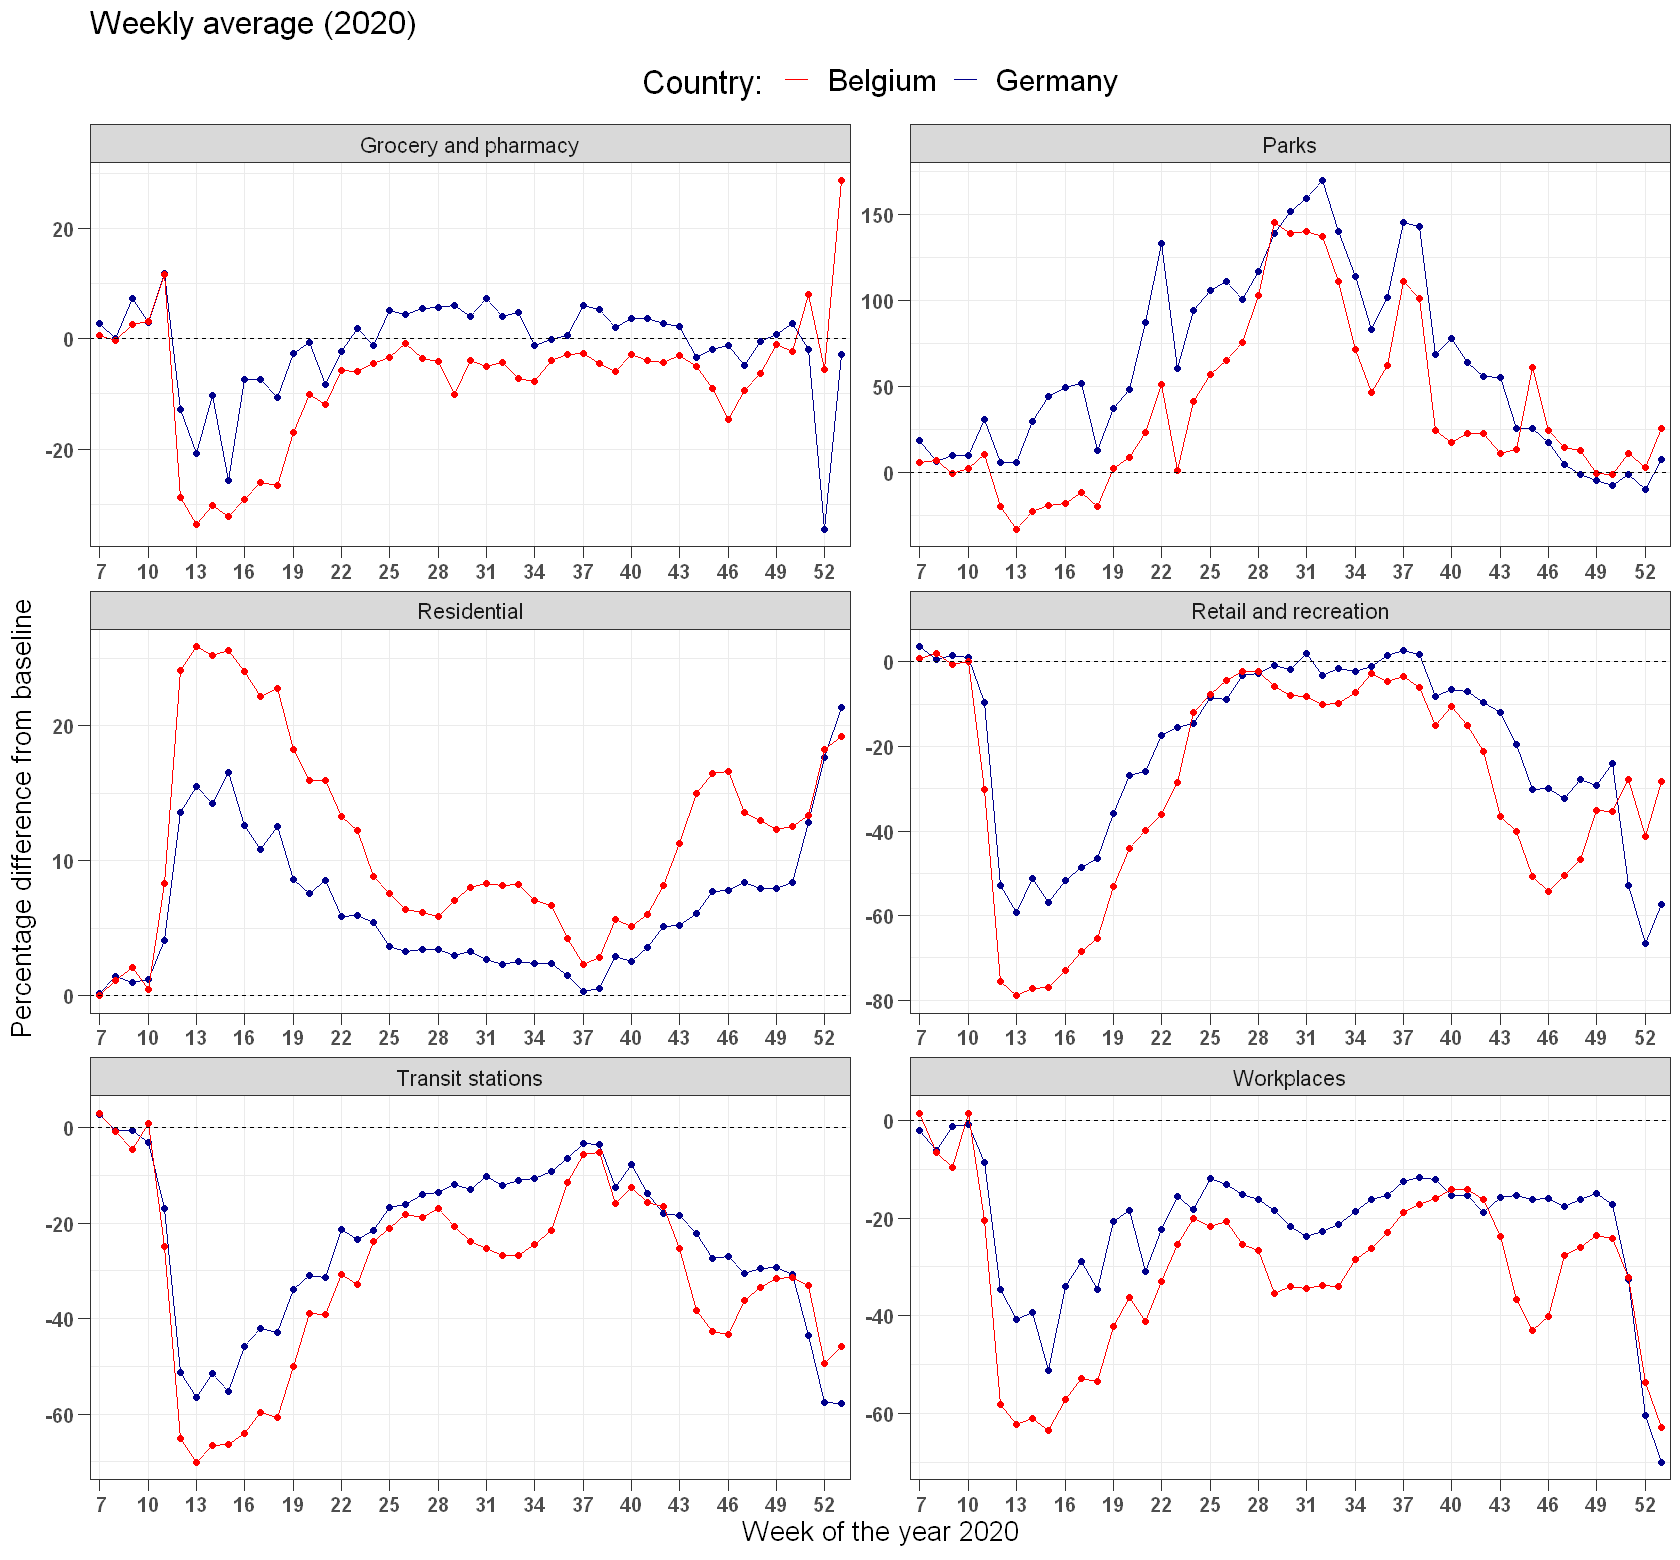

In [22]:
options(repr.plot.width=14, repr.plot.height=13)
plot = ggplot(plot_week, aes(x=date, group = cat)) + 
        geom_line(aes(y=perc_diff_g, colour="Germany")) + geom_point(aes(y=perc_diff_g), colour="darkblue") +
        geom_line(aes(y=perc_diff_b, colour="Belgium")) + geom_point(aes(y=perc_diff_b), colour="red") +
        labs(title=TeX('Weekly average (2020)'), 
             y = TeX('Percentage difference from baseline'), x = TeX('Week of the year $2020$'))+
        scale_color_manual(values = c('Germany' = 'darkblue','Belgium' = 'red')) + labs(color = 'Country:')+
        scale_x_discrete(limits=seq(7,52,3)) +
        geom_hline(aes(yintercept = 0), linetype = "dashed", color="black") +
        theme(plot.title = element_text(color="black", size=19, face="bold.italic"), 
        axis.title.x = element_text(color="black", size=16, face="bold"),
        axis.title.y = element_text(color="black", size=16, face="bold"), 
        axis.ticks.length=unit(.25, "cm"),
        axis.text.x = element_text(face="bold", size=12),
        axis.text.y = element_text(face="bold", size=12), 
        legend.position="top", legend.title = element_text(size = 20), 
        legend.text = element_text(size = 18))
plot + facet_wrap(. ~ categories, scales='free', ncol=2) + theme(strip.text.x = element_text(size=13))

The trend both in Germany and Belgium is quite similar, maybe indicating similar responses of the two contries to the covid19 pandemic. 

It is clear that transit stations, workplaces and retail and recreation have seen a drastic decrease in activity ($-60/80\%$ wrt the baseline) at around the 13th week of the year (beginning of April). <br>
Parks have remained constant at the beginning (since it was winter, probably not many people were going to the park anyway) but have seen a cospicuous rise in percentage in May (probably due to the lifting of the restrictions) showing continuous increase through July/August, when it reached a $\sim +150\%$. <br>
Also significant is the increment of the residential category, with a peak of $+ 25\%$ in Germany and $+15\%$ in Belgium around April.

In [23]:
# same as above but for the monthly averages

date_rep = rep(germany_m$date, times=6)
perc_diff_g = c(germany_m$RR, germany_m$GP, germany_m$P, germany_m$TS, germany_m$WP, germany_m$R)
perc_diff_b = c(belgium_m$RR, belgium_m$GP, belgium_m$P, belgium_m$TS, belgium_m$WP, belgium_m$R)
cat = rep(c("Retail and recreation", "Grocery and pharmacy", "Parks", "Transit stations", "Workplaces",
                  "Residential"), each = 11)
plot_month = tibble('date' = date_rep, 'perc_diff_g' = perc_diff_g, 'perc_diff_b' = perc_diff_b, 'categories' = cat)

Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"

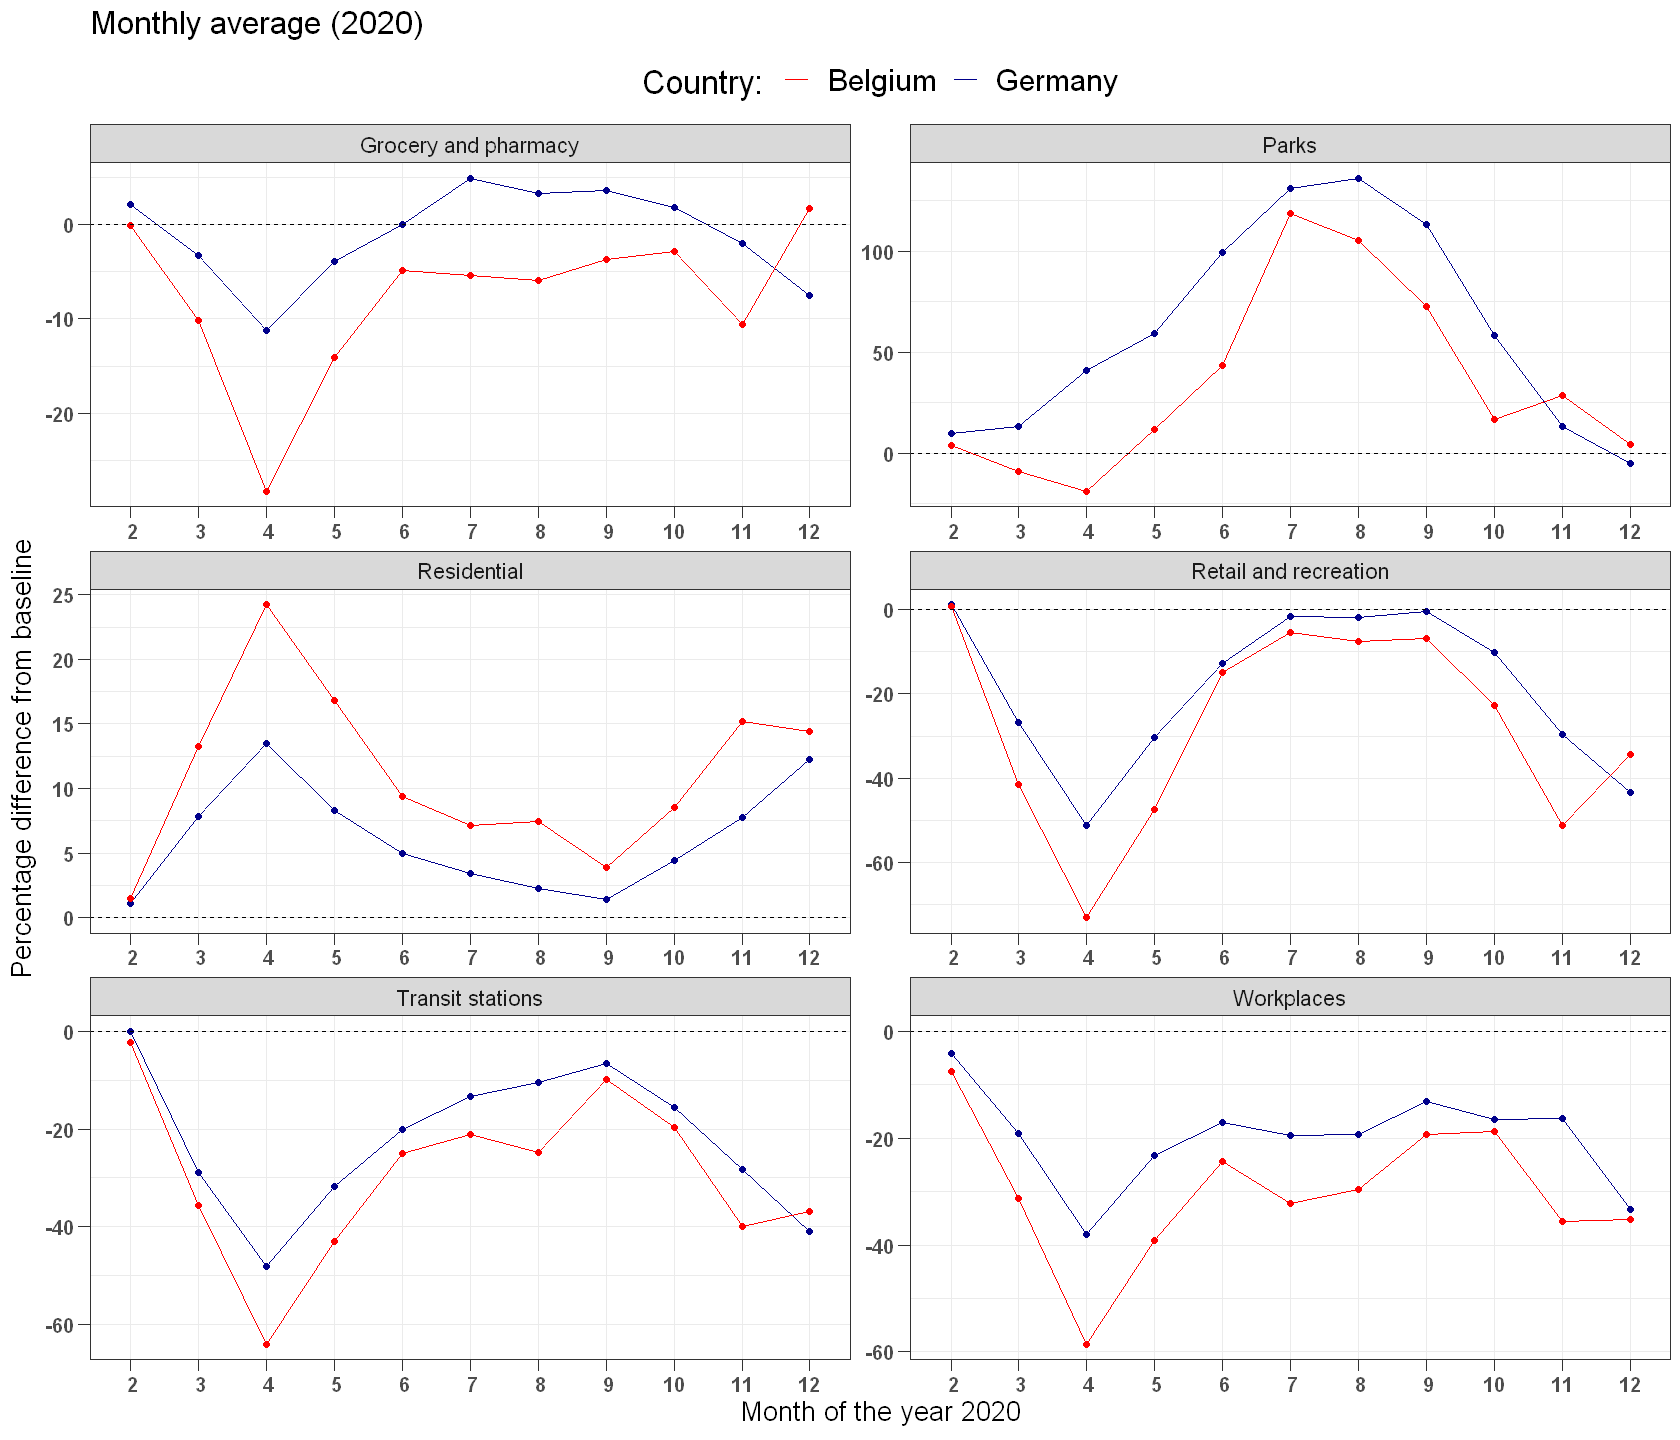

In [24]:
options(repr.plot.width=14, repr.plot.height=12)
plot = ggplot(plot_month, aes(x=date)) + 
        geom_line(aes(y=perc_diff_g, colour="Germany")) + geom_point(aes(y=perc_diff_g), colour="darkblue") +
        geom_line(aes(y=perc_diff_b, colour="Belgium")) + geom_point(aes(y=perc_diff_b), colour="red") +
        labs(title=TeX('Monthly average (2020)'), 
             y = TeX('Percentage difference from baseline'), x = TeX('Month of the year $2020$'))+
        scale_color_manual(values = c('Germany' = 'darkblue','Belgium' = 'red')) + labs(color = 'Country:')+
        scale_x_discrete(limits=2:12) +
        geom_hline(aes(yintercept = 0), linetype = "dashed", color="black") +
        theme(plot.title = element_text(color="black", size=19, face="bold.italic"), 
        axis.title.x = element_text(color="black", size=16, face="bold"),
        axis.title.y = element_text(color="black", size=16, face="bold"), 
        axis.ticks.length=unit(.25, "cm"),
        axis.text.x = element_text(face="bold", size=12),
        axis.text.y = element_text(face="bold", size=12),
        legend.position="top", legend.title = element_text(size = 20), 
        legend.text = element_text(size = 18))
plot + facet_wrap(. ~ categories, scales='free', ncol=2) + theme(strip.text.x = element_text(size=13))

In [25]:
gen_mean_g = germany %>% mutate(date = year(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)
gen_mean_b = belgium %>% mutate(date = year(date)) %>% group_by(date) %>% summarize_all(mean, na.rm=TRUE)
cat(paste(round(gen_mean_b$TS,3), round(gen_mean_g$TS,3)))

-30.575 -23.242

For what concerns transport stations, the impact has been definitely negative, with an average percentage difference from the baseline, for Germany, of $\sim -23\%$ over the whole year and for Belgium of $\sim -31\%$ <br>
The biggest decrease was seen at around April ($-60\%$ for Germany and $-50\%$ for Belgium), with a subsequent constant improvement until in September it almost reached pre-covid levels, averaging at a monthly $-10\%$. From there it started to decrease again, reaching around $-40\%$ in December.